In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [26]:
from google.colab import files
uploaded = files.upload()
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Load the data
pharma_data = pd.read_csv("Pharmaceuticals.csv")

Saving Pharmaceuticals.csv to Pharmaceuticals (1).csv


In [4]:
print(pharma_data.head())

  Symbol                 Name  Market_Cap  Beta  PE_Ratio   ROE   ROA  \
0    ABT  Abbott Laboratories       68.44  0.32      24.7  26.4  11.8   
1    AGN       Allergan, Inc.        7.58  0.41      82.5  12.9   5.5   
2    AHM         Amersham plc        6.30  0.46      20.7  14.9   7.8   
3    AZN      AstraZeneca PLC       67.63  0.52      21.5  27.4  15.4   
4    AVE              Aventis       47.16  0.32      20.1  21.8   7.5   

   Asset_Turnover  Leverage  Rev_Growth  Net_Profit_Margin  \
0             0.7      0.42        7.54               16.1   
1             0.9      0.60        9.16                5.5   
2             0.9      0.27        7.05               11.2   
3             0.9      0.00       15.00               18.0   
4             0.6      0.34       26.81               12.9   

  Median_Recommendation Location Exchange  
0          Moderate Buy       US     NYSE  
1          Moderate Buy   CANADA     NYSE  
2            Strong Buy       UK     NYSE  
3         Mo

#Removing non-numeric columns

In [29]:

numerical_data = pharma_data.iloc[:, 0:9]
numerical_data.head()


,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage
0,ABT,Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42
1,AGN,"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60
2,AHM,Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27
3,AZN,AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00
4,AVE,Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34


#Treating Missing Values and Scaling

In [30]:
import warnings
warnings.filterwarnings("ignore")
n_columns = pharma_data.select_dtypes(include=['float64', 'int64']).columns
nc_data = pharma_data[n_columns]
nc_data.fillna(numerical_data.mean(), inplace=True)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(nc_data)
scaled_data = pd.DataFrame(scaled_data, columns=n_columns)
print(scaled_data.head())

   Market_Cap      Beta  PE_Ratio       ROE       ROA  Asset_Turnover  \
0    0.188642 -0.821041 -0.047867  0.041080  0.247579   -5.247542e-16   
1   -0.875518 -0.461835  3.583430 -0.875950 -0.965557    9.453132e-01   
2   -0.897899 -0.262277 -0.299168 -0.740094 -0.522666    9.453132e-01   
3    0.174479 -0.022807 -0.248907  0.109009  0.940799    9.453132e-01   
4   -0.183447 -0.821041 -0.336863 -0.271389 -0.580435   -4.726566e-01   

   Leverage  Rev_Growth  Net_Profit_Margin  
0 -0.217336   -0.540801           0.063205  
1  0.018736   -0.390551          -1.592035  
2 -0.414062   -0.586247          -0.701953  
3 -0.768169    0.151089           0.359900  
4 -0.322256    1.246425          -0.436490  


#Clusters and Elbow Method

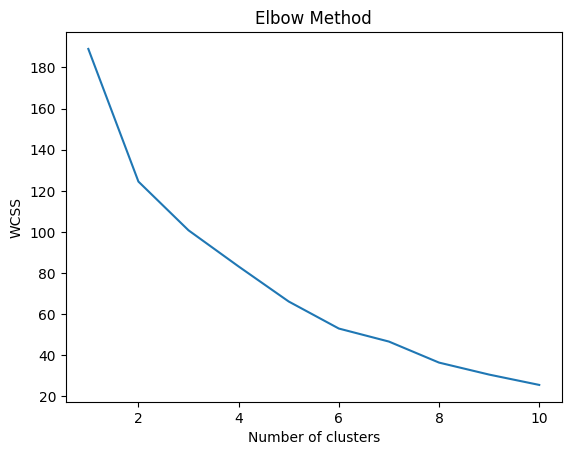

In [32]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [34]:

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(scaled_data)
pharma_data['Cluster'] = kmeans.labels_
pharma_data.head()



,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange,Cluster
0,ABT,Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy,US,NYSE,1
1,AGN,"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,Moderate Buy,CANADA,NYSE,2
2,AHM,Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy,UK,NYSE,2
3,AZN,AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,Moderate Sell,UK,NYSE,1
4,AVE,Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,FRANCE,NYSE,0


#Clustering

In [35]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=40)
clusters = kmeans.fit_predict(scaled_data)
pharma_data["Cluster"] = clusters
print(pharma_data["Cluster"].value_counts())

1    11
0     6
2     4
Name: Cluster, dtype: int64


#Visualising Clusters

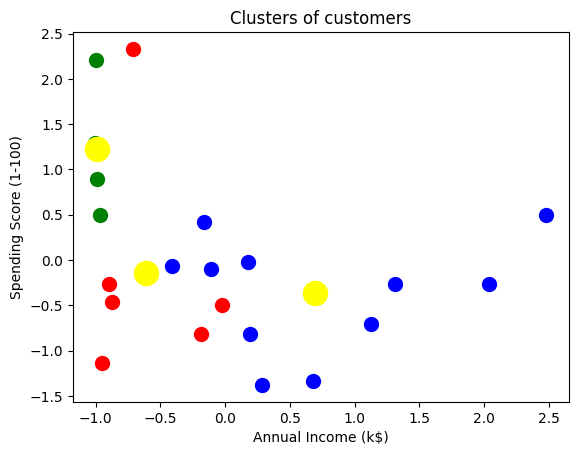

In [36]:
plt.scatter(scaled_data.iloc[clusters == 0, 0], scaled_data.iloc[clusters == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(scaled_data.iloc[clusters == 1, 0], scaled_data.iloc[clusters == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(scaled_data.iloc[clusters == 2, 0], scaled_data.iloc[clusters == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

#Analysis  of the clusters

In [37]:

# First Cluster
print(pharma_data[pharma_data["Cluster"] == 0].describe())

# Second Cluster
print(pharma_data[pharma_data["Cluster"] == 1].describe())

# Third Cluster
print(pharma_data[pharma_data["Cluster"] == 2].describe())


       Market_Cap      Beta   PE_Ratio        ROE       ROA  Asset_Turnover  \
count    6.000000  6.000000   6.000000   6.000000  6.000000        6.000000   
mean    22.906667  0.490000  37.683333  12.866667  5.783333        0.683333   
std     22.943822  0.313433  26.183080   5.862650  2.338732        0.172240   
min      3.260000  0.240000  18.400000   3.900000  1.400000        0.500000   
25%      6.620000  0.340000  20.250000  10.875000  5.550000        0.600000   
50%     12.240000  0.405000  24.300000  13.200000  6.250000        0.600000   
75%     39.595000  0.447500  49.350000  14.550000  7.325000        0.825000   
max     56.240000  1.110000  82.500000  21.800000  7.800000        0.900000   

       Leverage  Rev_Growth  Net_Profit_Margin  Cluster  
count  6.000000    6.000000           6.000000      6.0  
mean   0.293333   14.005000           9.100000      0.0  
std    0.197349   12.345569           4.760252      0.0  
min    0.000000   -3.170000           2.600000      0.0 

#Pattern Analysis

In [38]:

categorical_columns = pharma_data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(pharma_data.groupby("Cluster")[column].value_counts(normalize=True))
    print("\n")
numeric_columns = pharma_data.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    print(pharma_data.groupby("Cluster")[column].mean())
    print("\n")

Cluster  Symbol
0        AGN       0.166667
         AHM       0.166667
         AVE       0.166667
         BAY       0.166667
         PHA       0.166667
         WPI       0.166667
1        ABT       0.090909
         AZN       0.090909
         BMY       0.090909
         GSK       0.090909
         JNJ       0.090909
         LLY       0.090909
         MRK       0.090909
         NVS       0.090909
         PFE       0.090909
         SGP       0.090909
         WYE       0.090909
2        CHTT      0.250000
         ELN       0.250000
         IVX       0.250000
         MRX       0.250000
Name: Symbol, dtype: float64


Cluster  Name                              
0        Allergan, Inc.                        0.166667
         Amersham plc                          0.166667
         Aventis                               0.166667
         Bayer AG                              0.166667
         Pharmacia Corporation                 0.166667
         Watson Pharmaceuticals, Inc.    

#Cluster Naming

In [22]:
cluster_names = {
    0: "High Growth, High Profitability",
    1: "Moderate Growth, Moderate Profitability",
    2: "Low Growth, Low Profitability"
}
pharma_data['Cluster Name'] = pharma_data['Cluster'].map(cluster_names)
print(pharma_data.head())

  Symbol                 Name  Market_Cap  Beta  PE_Ratio   ROE   ROA  \
0    ABT  Abbott Laboratories       68.44  0.32      24.7  26.4  11.8   
1    AGN       Allergan, Inc.        7.58  0.41      82.5  12.9   5.5   
2    AHM         Amersham plc        6.30  0.46      20.7  14.9   7.8   
3    AZN      AstraZeneca PLC       67.63  0.52      21.5  27.4  15.4   
4    AVE              Aventis       47.16  0.32      20.1  21.8   7.5   

   Asset_Turnover  Leverage  Rev_Growth  Net_Profit_Margin  \
0             0.7      0.42        7.54               16.1   
1             0.9      0.60        9.16                5.5   
2             0.9      0.27        7.05               11.2   
3             0.9      0.00       15.00               18.0   
4             0.6      0.34       26.81               12.9   

  Median_Recommendation Location Exchange  Cluster  \
0          Moderate Buy       US     NYSE        1   
1          Moderate Buy   CANADA     NYSE        2   
2            Strong Buy   

In [40]:
print("Cluster labels and Names")
print(pharma_data)

Cluster labels and Names
   Symbol                                Name  Market_Cap  Beta  PE_Ratio  \
0     ABT                 Abbott Laboratories       68.44  0.32      24.7   
1     AGN                      Allergan, Inc.        7.58  0.41      82.5   
2     AHM                        Amersham plc        6.30  0.46      20.7   
3     AZN                     AstraZeneca PLC       67.63  0.52      21.5   
4     AVE                             Aventis       47.16  0.32      20.1   
5     BAY                            Bayer AG       16.90  1.11      27.9   
6     BMY        Bristol-Myers Squibb Company       51.33  0.50      13.9   
7    CHTT                        Chattem, Inc        0.41  0.85      26.0   
8     ELN               Elan Corporation, plc        0.78  1.08       3.6   
9     LLY               Eli Lilly and Company       73.84  0.18      27.9   
10    GSK                 GlaxoSmithKline plc      122.11  0.35      18.0   
11    IVX                    IVAX Corporation      

        PC1       PC2  Cluster
0  0.529215  0.473756        1
1 -1.910449  3.503199        0
2 -0.715903  0.962901        0
3  1.240740  0.240173        1
4 -0.494922 -0.220867        0


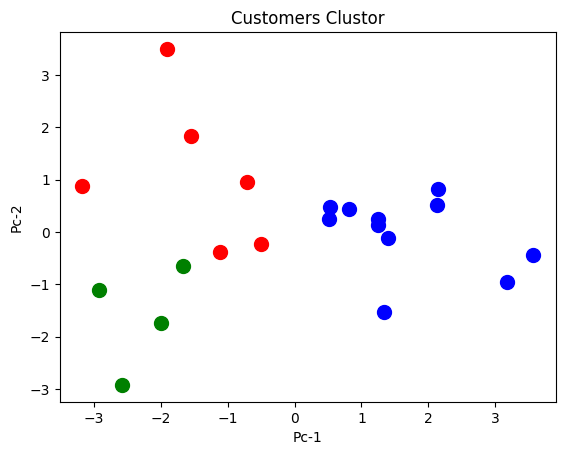

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
principal_df = pd.DataFrame(data=principal_components, columns=["PC1", "PC2"])
principal_df["Cluster"] = clusters
print(principal_df.head())


plt.scatter(principal_df.iloc[clusters == 0, 0], principal_df.iloc[clusters == 0, 1], s=100, c='red', label='C-1')
plt.scatter(principal_df.iloc[clusters == 1, 0], principal_df.iloc[clusters == 1, 1], s=100, c='blue', label='C-2')
plt.scatter(principal_df.iloc[clusters == 2, 0], principal_df.iloc[clusters == 2, 1], s=100, c='green', label='C-3')
plt.title('Customers Clustor')
plt.xlabel('Pc-1')
plt.ylabel('Pc-2')
plt.show()
